In [0]:
from pyspark.sql.functions import col, avg, lit, to_date
from functools import reduce

dfs = []

for yr in range(1976, 2025):
    file_path = f"dbfs:/FileStore/Shannon_all_year/dataPreprocessed/{yr}.csv"
    df_year = spark.read.format("csv").option("header", "true").load(file_path)
    
    df_year = df_year.withColumn("date", to_date(col("date"), "dd-MM-yyyy"))
    
    # Setting the year column directly from the loop variable rather than computing it
    df_year = df_year.withColumn("year", lit(yr))
    
    df_year_avg = df_year.groupBy("year").agg(
        avg("winddir").alias("avg_winddir"),
        avg("sky").alias("avg_sky"),
        avg("visdist").alias("avg_visdist"),
        avg("airtemp").alias("avg_airtemp"),
        avg("dewpointtemp").alias("avg_dewpointtemp"),
        avg("atmpress").alias("avg_atmpress")
    )
    
    dfs.append(df_year_avg)

average_attributes_all_years = reduce(lambda df1, df2: df1.union(df2), dfs)

average_attributes_all_years_df=average_attributes_all_years.orderBy("year")

In [0]:
average_attributes_all_years_df.display()

year,avg_winddir,avg_sky,avg_visdist,avg_airtemp,avg_dewpointtemp,avg_atmpress
1976,267.0931439265056,9458.661874787342,11150.39103436543,10.280367471929228,7.882119768628784,3512.6025263692686
1977,242.67793928027194,11220.204841167506,11819.006036806939,10.27172664400422,7.463234087445785,5484.65441917759
1978,259.0216161495861,10150.171202286667,12585.516167450724,10.361996069790985,9.003840886083486,5732.278764962134
1979,252.1441838314085,10707.195261340636,13462.296761519228,9.512084771996665,6.98823074175497,5436.014281462469
1980,250.1360174102285,9670.562976060935,11499.802230685527,10.232997823721437,7.489234221980412,4738.941913764625
1981,233.87099439362643,9424.075656535852,11722.749247565653,10.389141339628209,7.901215697845971,5416.3882738275215
1982,250.9540862621741,10309.375355392898,11845.72536446676,10.53584780110097,8.221117899703586,5337.062264836037
1983,229.00645201315217,10123.520565791923,12628.065388671754,10.824567280848711,8.363074632421377,5165.353892921561
1984,275.54552179005117,12335.509153670715,19305.484620600382,10.248690131295152,7.267823460519008,5164.288035505303
1985,216.43718917522443,11186.57546987018,19427.97791125751,9.630175030678892,7.6783052380029435,4980.555292901838


In [0]:
from pyspark.sql.functions import corr

correlation_results = {}


for attribute in ["avg_winddir", "avg_sky", "avg_visdist", "avg_airtemp", "avg_dewpointtemp","avg_atmpress"]:
    # Combining 'year' column and the current attribute column into a single DataFrame for correlation calculation
    combined_df = average_attributes_all_years_df.select("year", attribute)
    
    # Calculate the correlation coefficient between 'year' and the current attribute
    # Note: The `corr` method is called on DataFrame's `stat` property, and column names are passed as strings
    correlation_coefficient = combined_df.stat.corr("year", attribute)
    
    # Store the result
    correlation_results[attribute] = correlation_coefficient


for attribute, coefficient in correlation_results.items():
    print(f"Pearson's correlation coefficient between year and {attribute}: {coefficient}")

Pearson's correlation coefficient between year and avg_winddir: -0.6022184956667538
Pearson's correlation coefficient between year and avg_sky: 0.6488343454748183
Pearson's correlation coefficient between year and avg_visdist: 0.3089705994841999
Pearson's correlation coefficient between year and avg_airtemp: 0.12420324879143615
Pearson's correlation coefficient between year and avg_dewpointtemp: 0.004606792949715626
Pearson's correlation coefficient between year and avg_atmpress: 0.3978533924537653


In [0]:
from pyspark.sql import functions as F
import pandas as pd
import scipy.stats as stats

# DataFrame.stat.corr() method only calculates Pearson's correlation coefficient, and unfortunately, it does not provide p-values directly
# so converting to pandas is the option ti evaluate p-values to see the significance of the correlation coefficients found for each pair.

results = []

for attribute in ["avg_winddir", "avg_sky", "avg_visdist", "avg_airtemp", "avg_dewpointtemp", "avg_atmpress"]:
    # Converting the necessary columns to a Pandas DataFrame
    pandas_df = average_attributes_all_years_df.select('year', attribute).toPandas()
    
    # Calculating Pearson's correlation coefficient and the p-value
    corr_coef, p_value = stats.pearsonr(pandas_df['year'], pandas_df[attribute])
    
    results.append({
        'attribute': attribute,
        'corr_coef': corr_coef,
        'p_value': p_value
    })

for result in results:
    print(f"Pearson's correlation coefficient between year and {result['attribute']}: {result['corr_coef']}")
    print(f"P-value between year and {result['attribute']}: {result['p_value']}")

Pearson's correlation coefficient between year and avg_winddir: -0.6022184956667541
P-value between year and avg_winddir: 4.699088383624595e-06
Pearson's correlation coefficient between year and avg_sky: 0.648834345474818
P-value between year and avg_sky: 4.6044411294731995e-07
Pearson's correlation coefficient between year and avg_visdist: 0.3089705994842001
P-value between year and avg_visdist: 0.03076332738509504
Pearson's correlation coefficient between year and avg_airtemp: 0.124203248791438
P-value between year and avg_airtemp: 0.39517072392887664
Pearson's correlation coefficient between year and avg_dewpointtemp: 0.004606792949714848
P-value between year and avg_dewpointtemp: 0.9749384078030081
Pearson's correlation coefficient between year and avg_atmpress: 0.3978533924537656
P-value between year and avg_atmpress: 0.004640634584796712


We saw some correlation in cases of wind direction, visibility distance, air temperature and atm pressure. So lets plot them and have a look at the scatter plots.


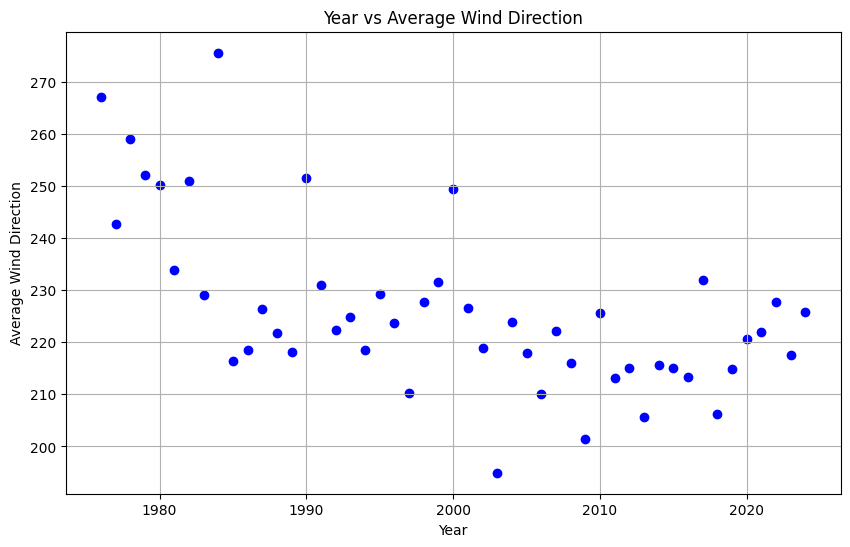

In [0]:


import matplotlib.pyplot as plt

# Convert 'year' and 'avg_winddir' columns to Pandas DataFrame for plotting
pandas_df = average_attributes_all_years_df.select('year', 'avg_winddir').toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['year'], pandas_df['avg_winddir'], color='blue')
plt.title('Year vs Average Wind Direction')
plt.xlabel('Year')
plt.ylabel('Average Wind Direction(Degrees)')
plt.grid(True)
plt.show()

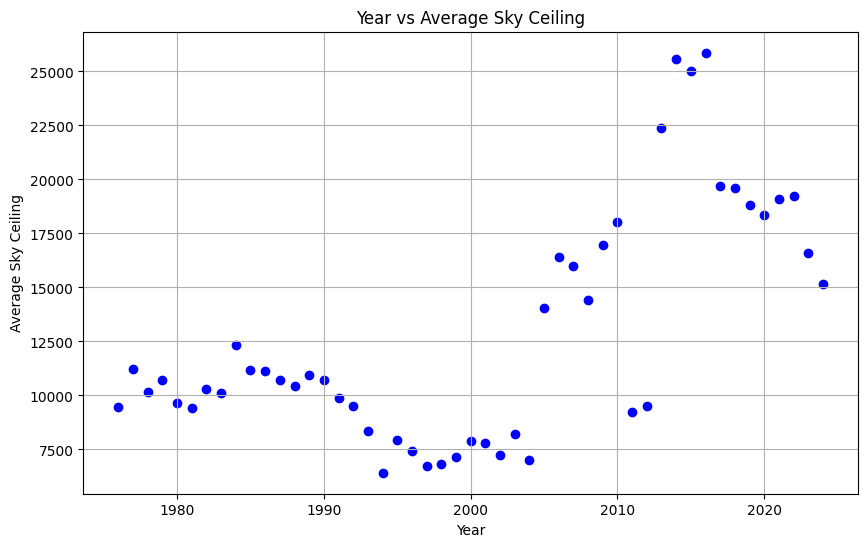

In [0]:
pandas_df = average_attributes_all_years_df.select('year', 'avg_sky').toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['year'], pandas_df['avg_sky'], color='blue')
plt.title('Year vs Average Sky Ceiling')
plt.xlabel('Year')
plt.ylabel('Average Sky Ceiling Height (Metres)')
plt.grid(True)
plt.show()

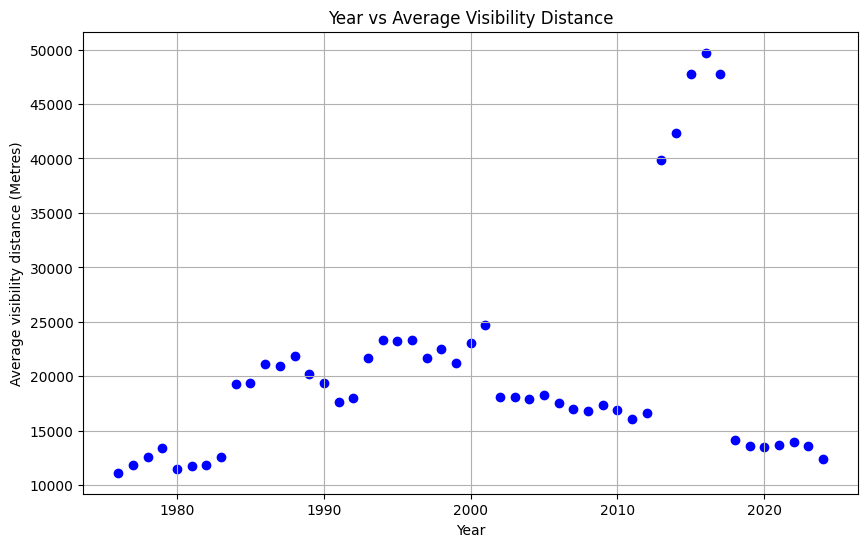

In [0]:
pandas_df = average_attributes_all_years_df.select('year', 'avg_visdist').toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['year'], pandas_df['avg_visdist'], color='blue')
plt.title('Year vs Average Visibility Distance')
plt.xlabel('Year')
plt.ylabel('Average visibility distance (Metres)')
plt.grid(True)
plt.show()

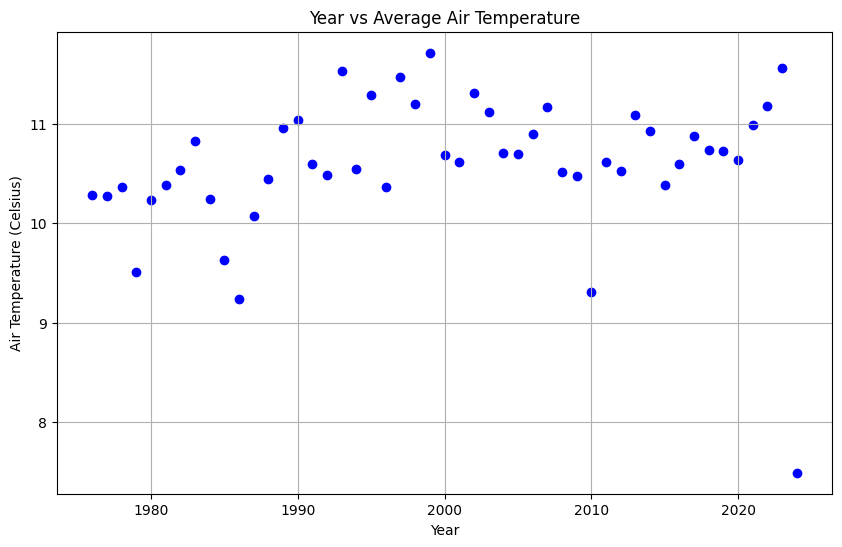

In [0]:
pandas_df = average_attributes_all_years_df.select('year', 'avg_airtemp').toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['year'], pandas_df['avg_airtemp'], color='blue')
plt.title('Year vs Average Air Temperature')
plt.xlabel('Year')
plt.ylabel('Air Temperature (Celsius)')
plt.grid(True)
plt.show()

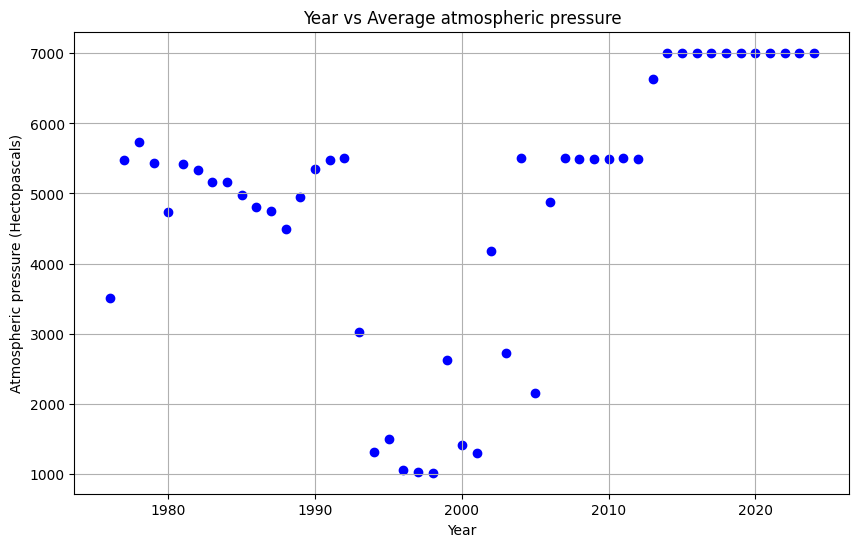

In [0]:
pandas_df = average_attributes_all_years_df.select('year', 'avg_atmpress').toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['year'], pandas_df['avg_atmpress'], color='blue')
plt.title('Year vs Average atmospheric pressure')
plt.xlabel('Year')
plt.ylabel('Atmospheric pressure (Hectopascals)')
plt.grid(True)
plt.show()